In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_ms = pdr.get_data_yahoo('MSFT')

In [4]:
df_ms.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-13,77.870003,77.290001,77.589996,77.489998,15335700.0,72.813454
2017-10-16,77.809998,77.349998,77.419998,77.650002,12380100.0,72.963806
2017-10-17,77.620003,77.250000,77.470001,77.589996,16824000.0,72.907394
2017-10-18,77.849998,77.370003,77.669998,77.610001,13300700.0,72.926208
2017-10-19,77.930000,77.349998,77.570000,77.910004,15092800.0,73.208115


In [5]:
df_ms['High'].max()

349.6700134277344

In [6]:
df_ms.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,87.500000,86.230003,87.120003,86.849998,71066700.0,82.018417
2018-12-31,116.180000,114.930000,115.419998,115.610001,111242100.0,110.590752
2019-12-31,159.550003,158.220001,159.449997,158.960007,55636400.0,154.973633
2020-12-31,232.860001,227.350006,229.270004,231.649994,97012700.0,227.637238
2021-12-31,349.670013,342.200012,344.619995,343.109985,69870600.0,340.882782
2022-12-31,338.000000,329.779999,335.350006,334.750000,90428900.0,332.577057


Day 2 TimeSeries


In [7]:
df_ms

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-13,77.870003,77.290001,77.589996,77.489998,15335700.0,72.813454
2017-10-16,77.809998,77.349998,77.419998,77.650002,12380100.0,72.963806
2017-10-17,77.620003,77.250000,77.470001,77.589996,16824000.0,72.907394
2017-10-18,77.849998,77.370003,77.669998,77.610001,13300700.0,72.926208
2017-10-19,77.930000,77.349998,77.570000,77.910004,15092800.0,73.208115
...,...,...,...,...,...,...
2022-10-06,250.339996,246.080002,247.929993,246.789993,20239900.0,246.789993
2022-10-07,241.320007,233.169998,240.899994,234.240005,37732400.0,234.240005
2022-10-10,234.559998,226.729996,233.050003,229.250000,29743600.0,229.250000


## Simple moving average

<AxesSubplot:xlabel='Date'>

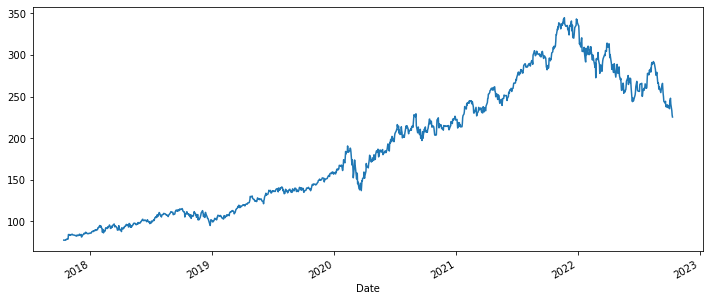

In [8]:
df_ms['Open'].plot(figsize=(12,5))

In [9]:
df_ms['Open 10 days roll']=df_ms['Open'].rolling(window=10,min_periods=1).mean()
df_ms['Open 30 days roll']=df_ms['Open'].rolling(window=10,min_periods=1).mean()
df_ms['Open 50 days roll']=df_ms['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

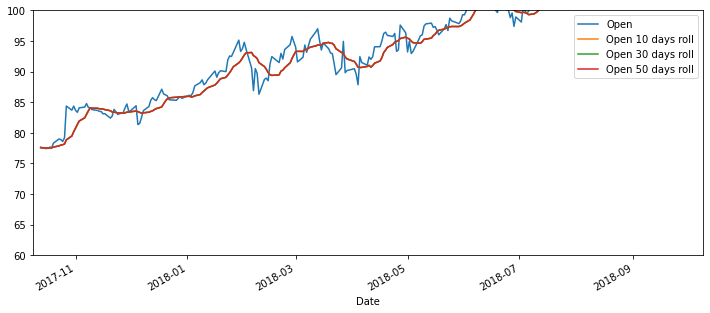

In [10]:
#df_ms[['Open','Open 10 days roll']].plot(xlim=['2017-10-08','2018-10-09'],ylim=[60,150],figsize=(12,5))
df_ms[['Open','Open 10 days roll','Open 30 days roll','Open 50 days roll']].plot(xlim=['2017-10-09','2018-10-09'],ylim=[60,100],figsize=(12,5))

In [11]:
df_ms=df_ms.drop('Open 10 days roll',axis=1)
df_ms=df_ms.drop('Open 30 days roll',axis=1)
df_ms=df_ms.drop('Open 50 days roll',axis=1)

# Cumulative moving average

<AxesSubplot:xlabel='Date'>

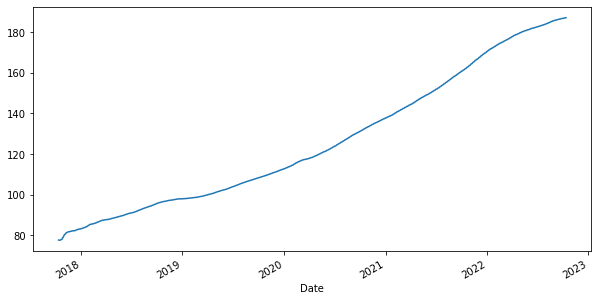

In [12]:
## Expanding

df_ms['Open'].expanding().mean().plot(figsize=(10,5))

# EWMA - Exponential Weighted Moving Average

ewma(t) = a*x(t) + (1-a)*ewma(t-1)
ewma = ((close-prevemwa)*m+prevEwma)

In [13]:
df_ms['ema']=df_ms['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

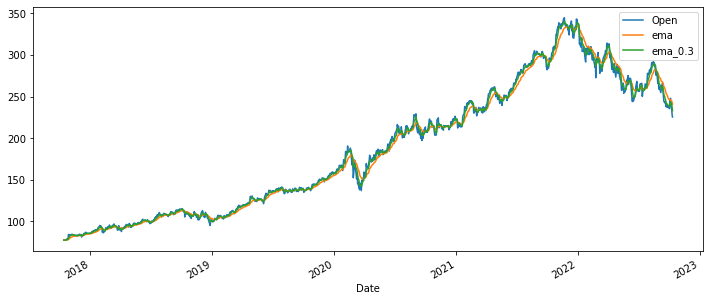

In [16]:
df_ms[['Open','ema','ema_0.3']].plot(figsize=(12,5))

In [15]:
df_ms['ema_0.3']=df_ms['Open'].ewm(alpha=0.3, adjust=False).mean()

In [23]:
df_ms=df_ms.drop('ema_0.3',axis=1)

In [24]:
df_ms

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-13,77.870003,77.290001,77.589996,77.489998,15335700.0,72.813454
2017-10-16,77.809998,77.349998,77.419998,77.650002,12380100.0,72.963806
2017-10-17,77.620003,77.250000,77.470001,77.589996,16824000.0,72.907394
2017-10-18,77.849998,77.370003,77.669998,77.610001,13300700.0,72.926208
2017-10-19,77.930000,77.349998,77.570000,77.910004,15092800.0,73.208115
...,...,...,...,...,...,...
2022-10-06,250.339996,246.080002,247.929993,246.789993,20239900.0,246.789993
2022-10-07,241.320007,233.169998,240.899994,234.240005,37732400.0,234.240005
2022-10-10,234.559998,226.729996,233.050003,229.250000,29743600.0,229.250000


In [18]:
df_ms['EMA_5']=df_ms['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

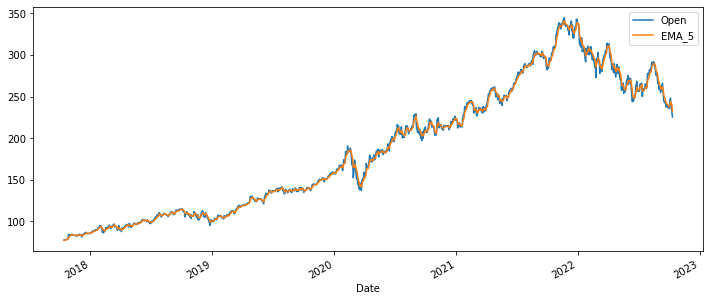

In [19]:
df_ms[['Open','EMA_5']].plot(figsize=(12,5))

## ARIMA

AR + I + MA

AutoRegression
Moving Average

In [25]:
df_ms

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-13,77.870003,77.290001,77.589996,77.489998,15335700.0,72.813454
2017-10-16,77.809998,77.349998,77.419998,77.650002,12380100.0,72.963806
2017-10-17,77.620003,77.250000,77.470001,77.589996,16824000.0,72.907394
2017-10-18,77.849998,77.370003,77.669998,77.610001,13300700.0,72.926208
2017-10-19,77.930000,77.349998,77.570000,77.910004,15092800.0,73.208115
...,...,...,...,...,...,...
2022-10-06,250.339996,246.080002,247.929993,246.789993,20239900.0,246.789993
2022-10-07,241.320007,233.169998,240.899994,234.240005,37732400.0,234.240005
2022-10-10,234.559998,226.729996,233.050003,229.250000,29743600.0,229.250000


In [37]:
df_close = df_ms[['Close']]
print(df_close)
for i in range(0,30):
    x=df_close.tail(365).mean()
    df_close.loc[len(df_close.index)]=x
    
df_close

                 Close
Date                  
2017-10-13   77.489998
2017-10-16   77.650002
2017-10-17   77.589996
2017-10-18   77.610001
2017-10-19   77.910004
...                ...
2022-10-06  246.789993
2022-10-07  234.240005
2022-10-10  229.250000
2022-10-11  225.410004
2022-10-12  225.750000

[1258 rows x 1 columns]


D:\Annaconda\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Close
Date,
2017-10-13 00:00:00,77.489998
2017-10-16 00:00:00,77.650002
2017-10-17 00:00:00,77.589996
2017-10-18 00:00:00,77.610001
2017-10-19 00:00:00,77.910004
...,...
1283,287.695219
1284,287.788658
1285,287.872353


<AxesSubplot:xlabel='Date'>

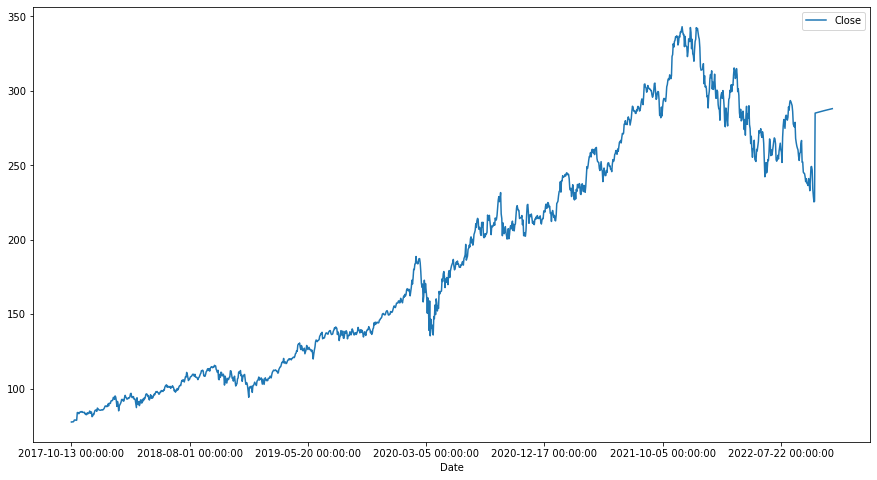

In [39]:
df_close.plot(figsize=(15,8))